In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
## import data and base tensorflow module


In [4]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
#Download and/or use cached mnist data

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
## Let's visualize a sample image in our ipython notebook
mnist.train.images[0].shape  ## So each image is a 28x28 pixel array

(784,)

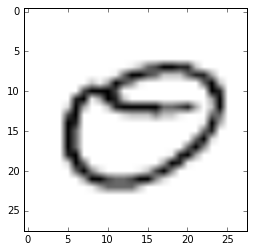

In [33]:
## http://matplotlib.org/examples/color/colormaps_reference.html Available color maps

# ### Image is listed as 784 need to reshape in a 28x28 image
sample_image = mnist.train.images[12]
from matplotlib import cm as cm
plt.imshow(np.reshape(-1.*sample_image,(28,28)),cmap=cm.Greys_r)


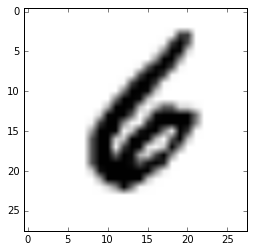

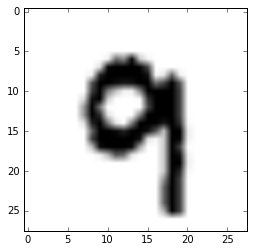

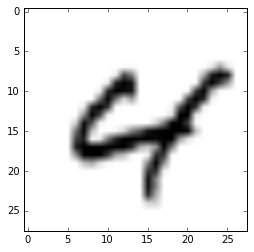

In [34]:
import time
for x in [5,10,200]:
    sample_image = mnist.train.images[x]
    plt.imshow(np.reshape(-1.*sample_image,(28,28)),cmap=cm.Greys_r)
    plt.figure()

### Fix so it shows more than one image. .

## Jon's homework
# from IPython.display import Image, HTML, display
# from glob import glob
# imagesList=''.join( ["<img style='width: 120px; margin: 0px; float: left; border: 1px solid black;' src='%s' />" % str(s) 
#                  for s in sorted(glob('yourimage*.png')) ])
# display(HTML(imagesList))

In [11]:
# Create a placeholder for the input data--"None" used because we can use any number of training examples
x = tf.placeholder(tf.float32, [None, 784])

In [12]:
# Create variables for model, W & b, since we know the dimensionality of the input (28x28=784 pixels) and output (10 classes)
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

In [16]:
# Model our output as a multi-class logistic regression (softmax is higher dimensional generalization of logreg)
y = tf.nn.softmax(tf.matmul(x, W) + b)
# Create placeholder for the correctly labeled data
y_ = tf.placeholder(tf.float32, [None, 10])

In [17]:
# Use cross-entropy as our cost function 
cross_entropy = -tf.reduce_sum(y_*tf.log(y))

In [18]:
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(cross_entropy)

In [19]:
init = tf.initialize_all_variables()

In [20]:
sess = tf.Session()
sess.run(init)

In [29]:
for i in range(1000):
  batch_xs, batch_ys = mnist.train.next_batch(100)
  sess.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})
correct_prediction = tf.equal(tf.argmax(y,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9154
